In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
from nltk.tokenize import word_tokenize

# Load and Prepare Data

In [8]:
# Dataset: SMS Spam Collection Dataset

df = pd.read_csv('datasets/sms.csv', 
                 encoding='latin-1',
                 sep='\t',  # Use tab as separator
                 quoting=3)  # Turn off quoting
df.columns = ['label', 'message']

# Convert spam/hamp to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# Data Exploration

## Basic Info

In [10]:
print("Dataset Info")
print(df.info())
print(df.head())
print(df.tail())

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5573 non-null   int64 
 1   message  5573 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
   label                                            message
0      0                      Ok lar... Joking wif u oni...
1      1  Free entry in 2 a wkly comp to win FA Cup fina...
2      0  U dun say so early hor... U c already then say...
3      0  Nah I don't think he goes to usf, he lives aro...
4      1  FreeMsg Hey there darling it's been 3 week's n...
      label                                            message
5568      1  This is the 2nd time we have tried 2 contact u...
5569      0              Will Ã¼ b going to esplanade fr home?
5570      0  Pity, * was in mood for that. So...any other s...
5571      0  The guy did some bitching but I acted like i'd...
55

## Statistics

In [20]:
print("Dataset Shape:")
print(f"Rows: {df.shape[0]}") 
print(f"Columns: {df.shape[1]}") 

print("Class Distribution")
class_dist = df['label'].value_counts()
for label,count in class_dist.items():
    perc = (count/len(df) * 100)
    print(f"{'Spam' if label == 1 else 'Ham'} : {count} ({perc:.2f}%)") 

Dataset Shape:
Rows: 5573
Columns: 2
Class Distribution
label
0    4826
1     747
Name: count, dtype: int64
Ham : 4826 (86.60%)
Spam : 747 (13.40%)


## Message length

In [21]:
df['message_length'] = df['message'].apply(len)
print("\n=== Message Length Statistics ===")
print(df['message_length'].describe())


=== Message Length Statistics ===
count    5573.000000
mean       80.599139
std        59.923962
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: message_length, dtype: float64


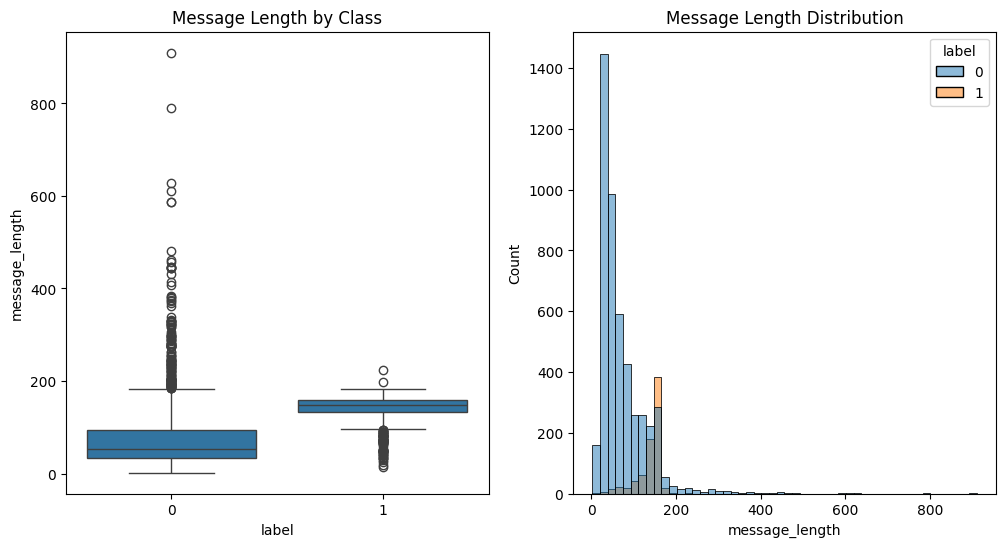

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(x= 'label', y= 'message_length', data= df)
plt.title('Message Length by Class')


plt.subplot(1,2,2)
sns.histplot(data=df, x='message_length',hue='label', bins=50)
plt.title('Message Length Distribution')
plt.show()

## Most Common Words

In [31]:
nltk.download('punkt')
def get_most_common_words(messages,top_n=10):
    #Combine all messages into one string
    text = ' '.join(messages)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    words = word_tokenize(text)

    # Remove punctuation and numbers
    words = [word for word in words if word.isalpha()]

    # Count words

    return Counter(words).most_common(top_n)


spam_words = get_most_common_words(df[df['label'] == 1]['message'])
ham_words = get_most_common_words(df[df['label'] == 0]['message'])

print("Most common words in SPAM")
for word,count in spam_words:
    print(f"{word}: {count}")

print("Most common words in HAM")

for word,count in ham_words:
    print(f"{word}:{count}")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yceta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words in SPAM
to: 690
a: 377
call: 346
you: 297
your: 263
free: 219
the: 206
for: 203
now: 199
or: 188
Most common words in HAM
i:2869
you:1938
to:1562
the:1131
a:1064
u:990
and:856
in:817
me:780
my:751


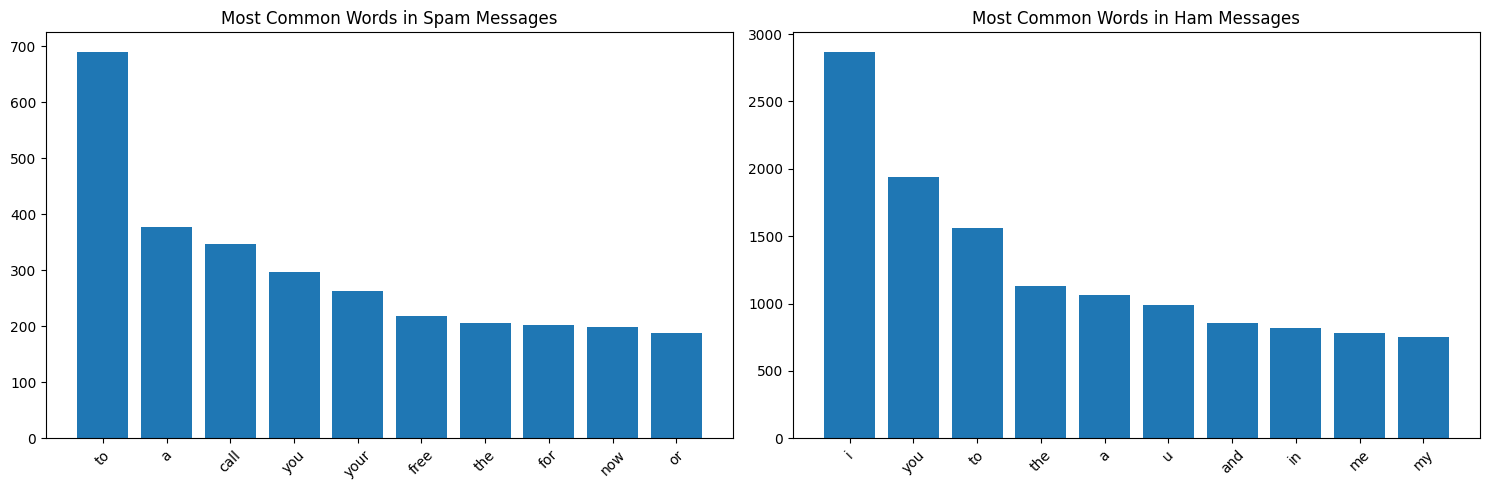

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
words, counts = zip(*spam_words)
plt.bar(words, counts)
plt.title('Most Common Words in Spam Messages')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
words, counts = zip(*ham_words)
plt.bar(words, counts)
plt.title('Most Common Words in Ham Messages')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
